In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df_user = pd.read_json("dim_customer.json")
df_user

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [44]:
df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# Easy

# 1. How many unique customers are in the dataset?

In [22]:
print("There are a total of " + str(len(df["customer_id"].unique())) + " unique customers.")

There are a total of 5191 unique customers.


# 2. What are the different categories of products available? How many unique categories are there?

In [19]:
df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [20]:
len(df["category"].unique())

8

# 3. Which payment method is the most popular? How many times was it used?

In [46]:
payment = df["payment_method"].value_counts()
payment.head(1)

Cash    44447
Name: payment_method, dtype: int64

# Medium

# 1. What are the three most popular categories, by total sales?

In [47]:
df["Total Sales"] = df["quantity"] * df["price"]
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [54]:
cool = df.groupby("category").sum().sort_values("Total Sales", ascending = False)
cool.head(3)["Total Sales"]

/var/folders/lm/zr_k_vts5mdb0_pd79vp4dhr0000gn/T/ipykernel_35758/2725420676.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cool = df.groupby("category").sum().sort_values("Total Sales", ascending = False)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: Total Sales, dtype: float64

# 2. What are the total sales attributed to customers over the age of 45?

In [56]:
df = df.rename(columns={"customer_id": "id"})
df


,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [59]:
merged = pd.merge(df, df_user, on = "id")
merged

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,Perez


In [76]:
merged_over45 = merged.loc[merged["age"]>45]
merged_over45["Total Sales"].sum()

82039768.15

# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


In [78]:
# GOAL: GET INVOICE MONTH AND INVOICE YEAR

merged

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,Perez


In [82]:
merged["invoice_date"] = pd.to_datetime(df["invoice_date"])
merged

/var/folders/lm/zr_k_vts5mdb0_pd79vp4dhr0000gn/T/ipykernel_35758/2136453548.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged["invoice_date"] = pd.to_datetime(df["invoice_date"])


,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,2021-12-12,Metrocity,162.64,NaN,William,M,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,2021-09-11,Istinye Park,5401.53,NaN,William,M,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,2021-05-16,Zorlu Center,2700.72,NaN,William,M,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,2021-10-24,Istinye Park,15004.25,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,2022-09-21,Kanyon,600.17,NaN,Melissa,F,Bell
99453,I989120,6161,Books,5,75.75,Cash,2021-09-22,Viaport Outlet,378.75,36.0,Leslie,F,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,2021-03-28,Metropol AVM,7502.00,NaN,Kelly,F,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2021-03-16,Istinye Park,1200.32,47.0,Shawn,M,Perez


In [84]:
merged["invoice_month"] = merged["invoice_date"].dt.month
merged["invoice_year"] = merged["invoice_date"].dt.year

In [89]:
merged

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales,age,first_name,gender,last_name,invoice_month,invoice_year
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson,5,2022
1,I126377,229,Cosmetics,2,81.32,Credit Card,2021-12-12,Metrocity,162.64,NaN,William,M,Anderson,12,2021
2,I178419,229,Shoes,3,1800.51,Debit Card,2021-09-11,Istinye Park,5401.53,NaN,William,M,Anderson,9,2021
3,I847727,229,Clothing,3,900.24,Credit Card,2021-05-16,Zorlu Center,2700.72,NaN,William,M,Anderson,5,2021
4,I219251,229,Shoes,5,3000.85,Credit Card,2021-10-24,Istinye Park,15004.25,NaN,William,M,Anderson,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,2022-09-21,Kanyon,600.17,NaN,Melissa,F,Bell,9,2022
99453,I989120,6161,Books,5,75.75,Cash,2021-09-22,Viaport Outlet,378.75,36.0,Leslie,F,Bass,9,2021
99454,I791963,6779,Clothing,5,1500.40,Credit Card,2021-03-28,Metropol AVM,7502.00,NaN,Kelly,F,Roberts,3,2021
99455,I100582,8386,Clothing,2,600.16,Cash,2021-03-16,Istinye Park,1200.32,47.0,Shawn,M,Perez,3,2021


In [91]:
merged["dummy_count"] = 1

In [93]:
# IDEA: i WILL MAKE 3 SEPARATE GRAPHS FOR YEARS 2021, 2022, 2023 which aims to show 
#         "DISTRIBUTION OF NUMBER OF ORDERS PER MONTH"

In [98]:
dates_and_count = merged.groupby(["invoice_year","invoice_month"]).sum()
dates_and_count

/var/folders/lm/zr_k_vts5mdb0_pd79vp4dhr0000gn/T/ipykernel_35758/59251373.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dates_and_count = merged.groupby(["invoice_year","invoice_month"]).sum()


id  quantity       price  Total Sales  \
invoice_year invoice_month                                               
2021         1              3754291     11247  2731715.63  10144984.61   
             2              3442530     10200  2340458.23   8542303.13   
             3              3982756     11764  2658188.62   9800678.66   
             4              3739400     11301  2588010.55   9450540.19   
             5              3896095     11548  2707258.52   9914426.32   
             6              3700639     11417  2629736.59   9646202.79   
             7              4032198     11866  2768883.33  10053632.67   
             8              3685469     11201  2615719.73   9635766.79   
             9              3667182     10881  2513869.72   9162967.58   
             10             3831213     11707  2728817.39  10096758.39   
             11             3698219     11229  2561503.85   9387385.23   
             12             3865158     11669  2647724.49   9709180.79   
2022         1              3892387     11585  2597895.08   9557837.04   
             2              3419565     10221  2344422.28   8453425.10   
             3              3880492     11887  2650310.41   9674466.65   
             4              3819456     11143  2526635.86   9256717.62   
             5              3815736     11674  2702414.82   9956260.40   
             6              3890993     11388  2579915.60   9486234.60   
             7              3838298     11684  2730382.71  10103176.87   
             8              3846319     11691  2646940.75   9757370.05   
             9              3718472     11368  2552491.60   9366162.26   
             10             3927893     11741  2699753.52   9893223.48   
             11             3617006     11208  2566299.21   9308015.87   
             12             3890479     11432  2623811.49   9618134.41   
2023         1              2722458      8336  1859750.18   6903463.62   
             2              2557552      7427  1666546.01   6100344.39   
             3               372426      1134   242528.60    897047.70   
             4               394499      1171   310955.59   1141351.65   
             5               425252      1203   286660.82   1051023.94   
             6               393582      1165   262898.94    972509.92   
             7               386738      1143   236719.50    851592.66   
             8               350747      1079   260252.25    951932.75   
             9               262225       781   169693.06    619346.14   
             10              244991       783   170409.09    660017.29   
             11              213314       694   174898.55    664752.51   
             12              245567       744   196893.34    716560.18   

                                 age  dummy_count  
invoice_year invoice_month                         
2021         1              110331.0         3771  
             2              102761.0         3402  
             3              116161.0         3918  
             4              111668.0         3770  
             5              117023.0         3864  
             6              109915.0         3761  
             7              118363.0         4014  
             8              114384.0         3750  
             9              105519.0         3619  
             10             117442.0         3873  
             11             114839.0         3744  
             12             114321.0         3896  
2022         1              111913.0         3842  
             2              101558.0         3445  
             3              113059.0         3927  
             4              108533.0         3738  
             5              110860.0         3852  
             6              111538.0         3788  
             7              109652.0         3870  
             8              114825.0         3881  
             9              109081.0         3752  
             10         

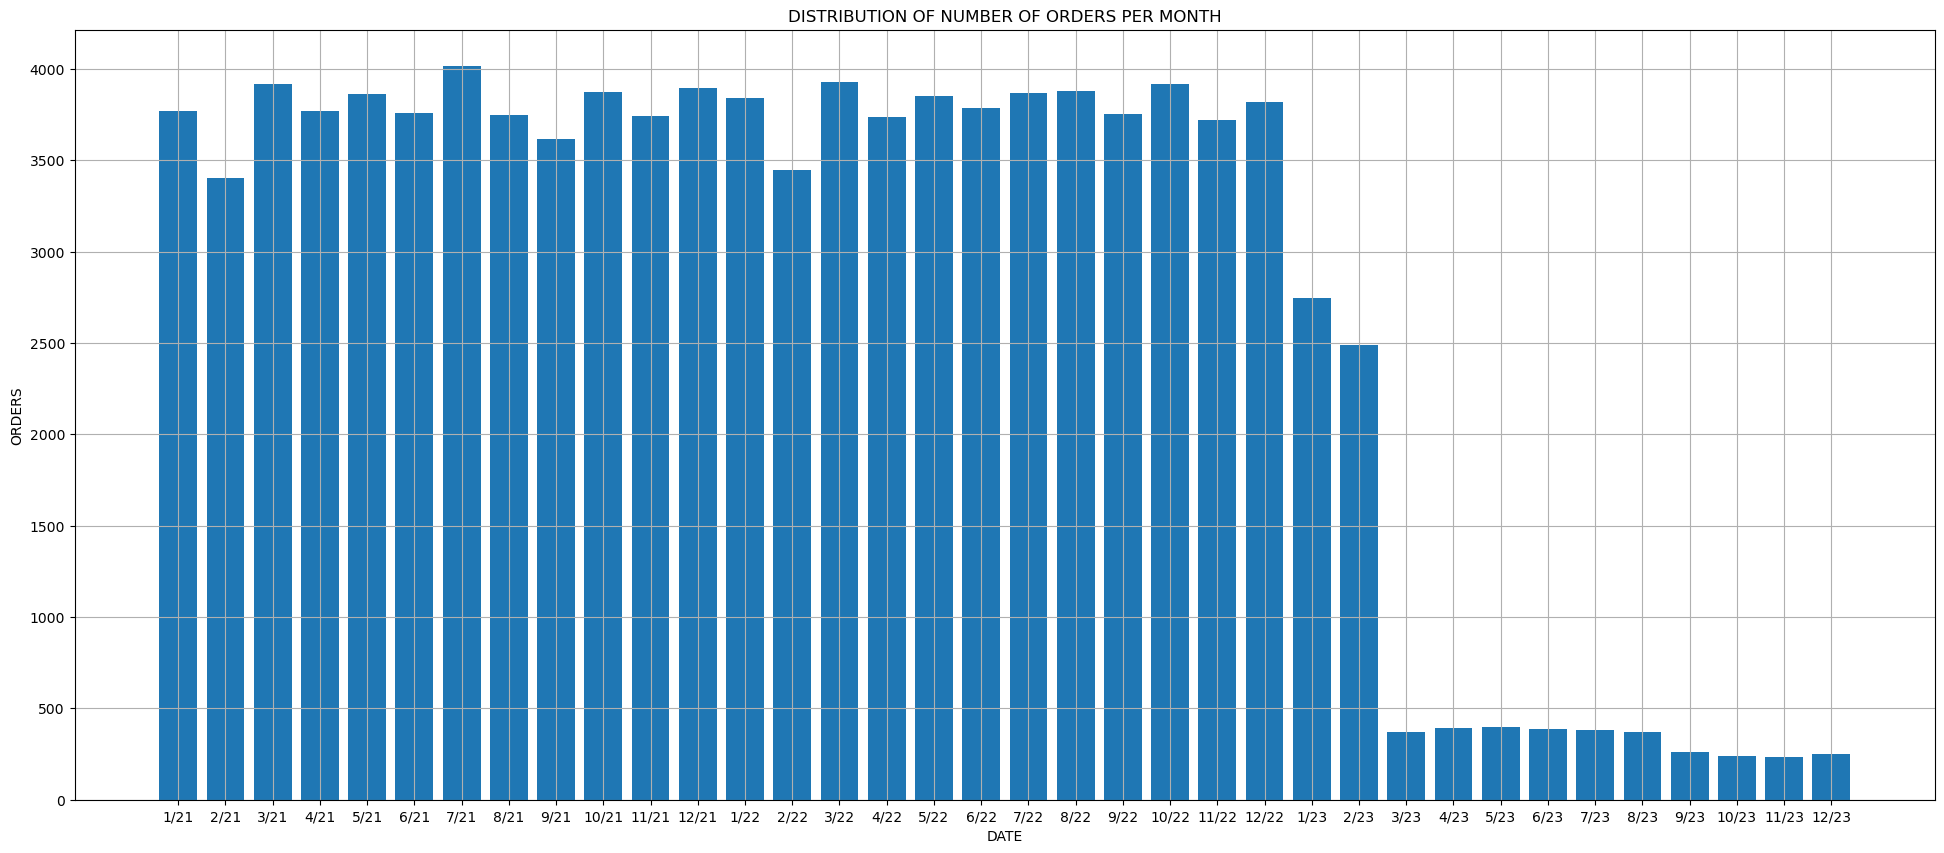

In [107]:
categories = []
for i in range(21, 23+1):
    for j in range(1, 12+1):
        output = str(j) + "/" + str(i)
        categories.append(output)

values = []
for k in dates_and_count["dummy_count"]:
    values.append(k)
    
plt.figure(figsize = (24,10))
plt.bar(categories, values)
plt.xlabel("DATE")
plt.ylabel("ORDERS")
plt.title("DISTRIBUTION OF NUMBER OF ORDERS PER MONTH")
plt.grid(True)
plt.show()



# Note: this graph shows how the number of order are distributed based on their respective invoice dates. They are grouped based on the month and year of their invoice date. From this graph, we can clearly see that the order count from 2021 to 2022 is relatively high. We can see a drop in total orders in January and February of 2023. After which, the amount of orders drop below 500 for the next following months in the year 2023.

# Hard

# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [109]:
merged

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales,age,first_name,gender,last_name,invoice_month,invoice_year,dummy_count
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson,5,2022,1
1,I126377,229,Cosmetics,2,81.32,Credit Card,2021-12-12,Metrocity,162.64,NaN,William,M,Anderson,12,2021,1
2,I178419,229,Shoes,3,1800.51,Debit Card,2021-09-11,Istinye Park,5401.53,NaN,William,M,Anderson,9,2021,1
3,I847727,229,Clothing,3,900.24,Credit Card,2021-05-16,Zorlu Center,2700.72,NaN,William,M,Anderson,5,2021,1
4,I219251,229,Shoes,5,3000.85,Credit Card,2021-10-24,Istinye Park,15004.25,NaN,William,M,Anderson,10,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,2022-09-21,Kanyon,600.17,NaN,Melissa,F,Bell,9,2022,1
99453,I989120,6161,Books,5,75.75,Cash,2021-09-22,Viaport Outlet,378.75,36.0,Leslie,F,Bass,9,2021,1
99454,I791963,6779,Clothing,5,1500.40,Credit Card,2021-03-28,Metropol AVM,7502.00,NaN,Kelly,F,Roberts,3,2021,1
99455,I100582,8386,Clothing,2,600.16,Cash,2021-03-16,Istinye Park,1200.32,47.0,Shawn,M,Perez,3,2021,1


In [110]:
# CATEGORY 1 - CATEGORY
# CATEGORY 2 - AGE RANGE
# VALUE      - SALES

In [158]:
list_of_agerange = []

for age in merged["age"]:
    if age >= 10 and age <= 19:
        list_of_agerange.append("10-19")
    elif age >= 20 and age <= 29:
        list_of_agerange.append("20-29")
    elif age >= 30 and age <= 39:
        list_of_agerange.append("30-39")
    elif age >= 40 and age <= 49:
        list_of_agerange.append("40-49")
    elif age >= 50 and age <= 59:
        list_of_agerange.append("50-59")
    elif age >= 60 and age <= 69:
        list_of_agerange.append("60-69")
    elif age >= 70 and age <= 79:
        list_of_agerange.append("70-79")
    elif age >= 80 and age <= 89:
        list_of_agerange.append("80-89")
    else:
        list_of_agerange.append("NO AGE")
    


merged["age_range"] = list_of_agerange
len(list_of_agerange)

merged
        



,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales,age,first_name,gender,last_name,invoice_month,invoice_year,dummy_count,age_range
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson,5,2022,1,NO AGE
1,I126377,229,Cosmetics,2,81.32,Credit Card,2021-12-12,Metrocity,162.64,NaN,William,M,Anderson,12,2021,1,NO AGE
2,I178419,229,Shoes,3,1800.51,Debit Card,2021-09-11,Istinye Park,5401.53,NaN,William,M,Anderson,9,2021,1,NO AGE
3,I847727,229,Clothing,3,900.24,Credit Card,2021-05-16,Zorlu Center,2700.72,NaN,William,M,Anderson,5,2021,1,NO AGE
4,I219251,229,Shoes,5,3000.85,Credit Card,2021-10-24,Istinye Park,15004.25,NaN,William,M,Anderson,10,2021,1,NO AGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,2022-09-21,Kanyon,600.17,NaN,Melissa,F,Bell,9,2022,1,NO AGE
99453,I989120,6161,Books,5,75.75,Cash,2021-09-22,Viaport Outlet,378.75,36.0,Leslie,F,Bass,9,2021,1,30-39
99454,I791963,6779,Clothing,5,1500.40,Credit Card,2021-03-28,Metropol AVM,7502.00,NaN,Kelly,F,Roberts,3,2021,1,NO AGE
99455,I100582,8386,Clothing,2,600.16,Cash,2021-03-16,Istinye Park,1200.32,47.0,Shawn,M,Perez,3,2021,1,40-49


In [159]:
filtered_merged = merged[["age_range", "Total Sales", "category"]]
filtered_merged





,age_range,Total Sales,category
0,NO AGE,7502.00,Clothing
1,NO AGE,162.64,Cosmetics
2,NO AGE,5401.53,Shoes
3,NO AGE,2700.72,Clothing
4,NO AGE,15004.25,Shoes
...,...,...,...
99452,NO AGE,600.17,Shoes
99453,30-39,378.75,Books
99454,NO AGE,7502.00,Clothing
99455,40-49,1200.32,Clothing


In [160]:
list_of_category = list(filtered_merged["category"])
list_of_sales = list(filtered_merged["Total Sales"])
list_of_agerange = list(filtered_merged["age_range"])

In [165]:

data = {'CATEGORY': list_of_category,
        'AGES': list_of_agerange,
        'SALES': list_of_sales}
df = pd.DataFrame(data)

# Create a pivot table with modified dimensions
pivot_table = df.pivot_table(values='SALES', index='CATEGORY', columns='AGES', aggfunc='sum')

pivot_table

AGES,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,NO AGE
CATEGORY,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
